In [90]:
%matplotlib inline

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns

import accuracies as a
reload(a)

<module 'accuracies' from 'accuracies.pyc'>

### Данные:
Здесь используются данные, которые получены в экспериментах 26.09.2017, 28.09.2017 **и 29.09.2017**
- eye - показания, сделанные с помощью глаза по "шаблону на банке"
- real - показания, сделанные с помощью прибора Sysmex UX-2000
- phone - показания алгоритма с метрикой median + manhattan + Lab + (2,5,3) на шаблоне без измененной яркости с использованием и без использования вспышки


**Дополнение:**

Из BLO удалены градации "негемолизированной крови" и 1-я градация гемолизированной.

In [141]:
eye = pd.read_csv('data/fourth_exp_29_09_17/eye_2_3_4_joined.csv')
real = pd.read_csv('data/fourth_exp_29_09_17/real_2_3_4_joined.csv')
phone = pd.read_csv('data/fourth_exp_29_09_17/phone_2_3_4_joined.csv')

In [142]:
phone_l = phone[phone.light=='light'].copy()
phone_n = phone[phone.light=='no_light'].copy()

In [143]:
for data in [eye,real,phone_l,phone_n]:
    data.sort_values('ID',inplace=True)

In [95]:
indicators = real.columns[1:]

In [96]:
print "Количество пациентов: ",real.shape[0]

Количество пациентов:  49



**soft-точность** - доля совпадений в +/-1 класс между двумя выборками:
$$SoftAccuracy(a,b) = \frac{1}{N} \sum_{i=1}^{N} [|a_i - b_i|<=1]$$

**hard-точность** - доля одинаковых ответов в двух выборках:
$$HardAccuracy(a,b) = \frac{1}{N} \sum_{i=1}^{N} [a_i == b_i]$$

### Сравнение глаза и стационарного прибора

In [97]:
def comparison(data1,data2):
    print "Точность попадания в тот же самый класс (hard-точность): "
    h = np.mean(a.hard_accuracy(data1,data2,indicators))
    print "Средняя hard-точность: %.2f\n"%h
    
    print "Точность попадания в +/- 1 класс (soft-точность):"
    s = np.mean(a.soft_accuracy(data1,data2,indicators))
    print "Средняя soft-точность: %.2f"%s

In [98]:
comparison(real,eye)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.86   0.49   0.90   0.82   0.84   0.86   0.80   0.96   0.29   0.53   

Средняя hard-точность: 0.73

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.90   1.00   1.00   0.88   0.98   1.00   0.88   1.00   0.78   0.94   

Средняя soft-точность: 0.93


In [126]:
a.soft_accuracy_report(real,eye,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.04   0.00   0.04   0.00   0.08   0.14   0.08   0.04   0.22   0.14   

ref - algo == 0
0.86   0.49   0.90   0.82   0.84   0.86   0.80   0.96   0.29   0.53   

ref - algo == -1
0.00   0.51   0.06   0.06   0.06   0.00   0.00   0.00   0.27   0.27   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.90   1.00   1.00   0.88   0.98   1.00   0.88   1.00   0.78   0.94   



array([ 0.89795918,  1.        ,  1.        ,  0.87755102,  0.97959184,
        1.        ,  0.87755102,  1.        ,  0.7755102 ,  0.93877551])

### Сравнение прибора и телефона без вспышки

In [130]:
real.BLO.value_counts() #Большой процент ошибок в BLO происходят между 0 и 3 градацией

0    37
5     4
4     4
3     2
2     2
Name: BLO, dtype: int64

In [149]:
eye.BLO.value_counts()

0    38
5     6
1     3
4     1
2     1
Name: BLO, dtype: int64

In [131]:
phone_n.BLO.value_counts()

3    21
0    20
5     5
4     3
Name: BLO, dtype: int64

In [132]:
comparison(real,phone_n)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.86   0.96   0.88   0.53   0.69   0.69   0.65   0.90   0.33   0.47   

Средняя hard-точность: 0.70

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.88   1.00   1.00   0.61   1.00   1.00   0.88   1.00   0.84   0.96   

Средняя soft-точность: 0.92


In [133]:
a.soft_accuracy_report(real,phone_n,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.02   0.00   0.04   0.02   0.06   0.14   0.06   0.10   0.24   0.10   

ref - algo == 0
0.86   0.96   0.88   0.53   0.69   0.69   0.65   0.90   0.33   0.47   

ref - algo == -1
0.00   0.04   0.08   0.06   0.24   0.16   0.16   0.00   0.27   0.39   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.88   1.00   1.00   0.61   1.00   1.00   0.88   1.00   0.84   0.96   



array([ 0.87755102,  1.        ,  1.        ,  0.6122449 ,  1.        ,
        1.        ,  0.87755102,  1.        ,  0.83673469,  0.95918367])

### Сравнение глаза и телефона без вспышки

In [134]:
comparison(eye,phone_n)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.94   0.53   0.88   0.53   0.65   0.84   0.71   0.94   0.47   0.31   

Средняя hard-точность: 0.68

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   0.98   0.57   0.98   1.00   1.00   1.00   0.88   0.88   

Средняя soft-точность: 0.93


In [135]:
a.soft_accuracy_report(eye,phone_n,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.04   0.47   0.06   0.02   0.06   0.00   0.04   0.06   0.18   0.18   

ref - algo == 0
0.94   0.53   0.88   0.53   0.65   0.84   0.71   0.94   0.47   0.31   

ref - algo == -1
0.02   0.00   0.04   0.02   0.27   0.16   0.24   0.00   0.22   0.39   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   0.98   0.57   0.98   1.00   1.00   1.00   0.88   0.88   



array([ 1.        ,  1.        ,  0.97959184,  0.57142857,  0.97959184,
        1.        ,  1.        ,  1.        ,  0.87755102,  0.87755102])

### Прибор vs телефон со вспышкой 

In [137]:
real.BLO.value_counts()

0    37
5     4
4     4
3     2
2     2
Name: BLO, dtype: int64

In [138]:
phone_l.BLO.value_counts()

3    38
5     6
4     3
0     2
Name: BLO, dtype: int64

In [139]:
comparison(real,phone_l)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.86   0.86   0.82   0.14   0.39   0.73   0.53   0.49   0.35   0.10   

Средняя hard-точность: 0.53

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.86   1.00   1.00   0.29   1.00   0.98   0.90   1.00   0.88   0.57   

Средняя soft-точность: 0.85


In [140]:
a.soft_accuracy_report(real,phone_l,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.00   0.00   0.04   0.02   0.04   0.06   0.04   0.10   0.29   0.00   

ref - algo == 0
0.86   0.86   0.82   0.14   0.39   0.73   0.53   0.49   0.35   0.10   

ref - algo == -1
0.00   0.14   0.14   0.12   0.57   0.18   0.33   0.41   0.24   0.47   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.86   1.00   1.00   0.29   1.00   0.98   0.90   1.00   0.88   0.57   



array([ 0.85714286,  1.        ,  1.        ,  0.28571429,  1.        ,
        0.97959184,  0.89795918,  1.        ,  0.87755102,  0.57142857])

### Глаз vs телефон со вспышкой

In [107]:
comparison(eye,phone_l)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.96   0.59   0.84   0.18   0.31   0.71   0.49   0.53   0.47   0.18   

Средняя hard-точность: 0.53

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   1.00   0.20   0.98   0.98   1.00   1.00   0.80   0.59   

Средняя soft-точность: 0.86


In [108]:
a.soft_accuracy_report(eye,phone_l,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.04   0.39   0.04   0.00   0.06   0.00   0.04   0.06   0.24   0.08   

ref - algo == 0
0.96   0.59   0.84   0.18   0.31   0.71   0.49   0.53   0.47   0.18   

ref - algo == -1
0.00   0.02   0.12   0.02   0.61   0.27   0.47   0.41   0.08   0.33   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   1.00   0.20   0.98   0.98   1.00   1.00   0.80   0.59   



array([ 1.        ,  1.        ,  1.        ,  0.20408163,  0.97959184,
        0.97959184,  1.        ,  1.        ,  0.79591837,  0.59183673])

### Сравнение между телефонами

In [109]:
comparison(phone_n,phone_l)

Точность попадания в тот же самый класс (hard-точность): 
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
0.98   0.82   0.90   0.59   0.61   0.61   0.65   0.59   0.65   0.14   

Средняя hard-точность: 0.66

Точность попадания в +/- 1 класс (soft-точность):
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   0.96   0.63   1.00   1.00   1.00   1.00   0.90   0.82   

Средняя soft-точность: 0.93


In [110]:
a.soft_accuracy_report(phone_n,phone_l,indicators)

URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
ref - algo == 1
0.02   0.04   0.00   0.00   0.02   0.12   0.06   0.00   0.24   0.00   

ref - algo == 0
0.98   0.82   0.90   0.59   0.61   0.61   0.65   0.59   0.65   0.14   

ref - algo == -1
0.00   0.14   0.06   0.04   0.37   0.27   0.29   0.41   0.00   0.67   

Total soft-accuracy:
URO    BIL    KET    BLO    PRO    NIT    LEU    GLU    SG    PH   
1.00   1.00   0.96   0.63   1.00   1.00   1.00   1.00   0.90   0.82   



array([ 1.        ,  1.        ,  0.95918367,  0.63265306,  1.        ,
        1.        ,  1.        ,  1.        ,  0.89795918,  0.81632653])

### Выводы:

Телефон со вспышкой сейчас даёт результаты хуже, чем телефон без вспышки.

### Посмотрим, есть ли систематическая погрешность у каждого индикатора на шаблоне.

Для этого будем считать точности для всех шаблонов, вычитая из референса целое число.

In [111]:
def h_acc(x,y): #hard-accuracy for one column
    return np.mean(x==y)

In [112]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('hls',n_colors=10)

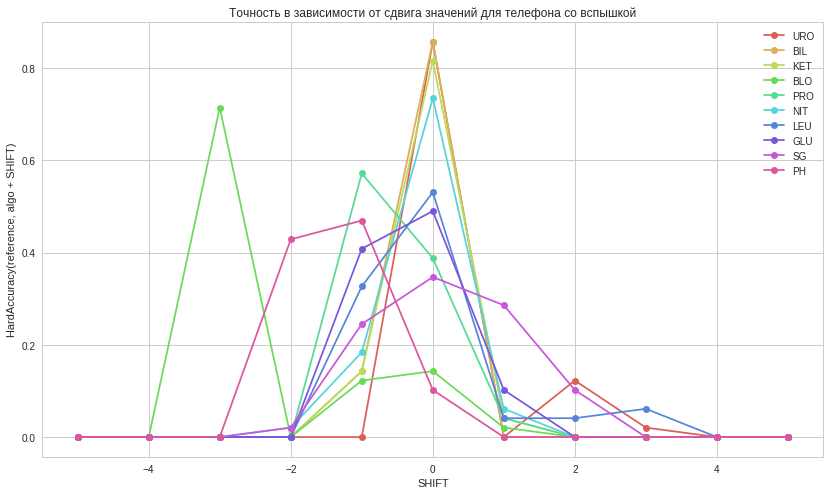

In [113]:
shifts = range(-5,6)
plt.figure(figsize=(14,8))
for column in indicators:
    accs = [h_acc(real[column].values,phone_l[column].values + i) for i in shifts] 
    plt.plot(shifts,accs,'o-',label=column)

plt.ylabel("HardAccuracy(reference, algo + SHIFT)")
plt.xlabel("SHIFT")
plt.title(u'Точность в зависимости от сдвига значений для телефона со вспышкой')
plt.legend()

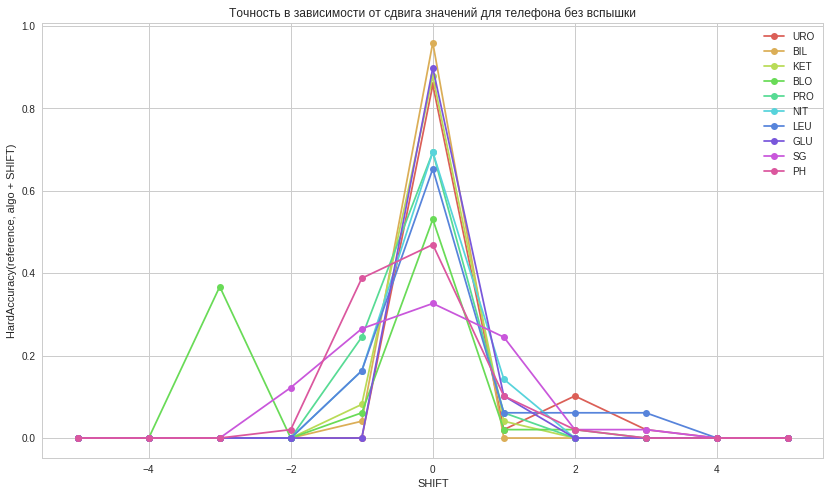

In [114]:
shifts = range(-5,6)
plt.figure(figsize=(14,8))
for column in indicators:
    accs = [h_acc(real[column].values,phone_n[column].values + i) for i in shifts] 
    plt.plot(shifts,accs,'o-',label=column)

plt.ylabel("HardAccuracy(reference, algo + SHIFT)")
plt.xlabel("SHIFT")
plt.title(u'Точность в зависимости от сдвига значений для телефона без вспышки')
plt.legend()

### Статистически ли значимы отличия в долях правильных ответов между телефоном со вспышкой и без вспышки?

In [115]:
import scipy.stats as stats
import statsmodels.stats.multitest as smm

In [116]:
def proportions_diff_z_stat_ind(sample1, sample2): #Z-статистика для разности долей
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))


def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    #достигаемый уровень значимости для Z-статистики
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)


In [117]:
p_vals = []
for column in indicators:
    sample_1 = np.abs(phone_l[column].values - real[column].values)<=1
    sample_2 = np.abs(phone_n[column].values - real[column].values)<=1

    Z = proportions_diff_z_stat_ind(sample_1,sample_2)
    p_vals.append(proportions_diff_z_test(Z))

/home/boris/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


In [118]:
print "Индикаторы, для которых статистически значимо отличие долей soft-правильных ответов: "
print indicators[smm.multipletests(p_vals)[0]].values

Индикаторы, для которых статистически значимо отличие долей soft-правильных ответов: 
['BLO' 'PH']


In [119]:
p_vals = []
for column in indicators:
    sample_1 = phone_l[column].values == real[column].values
    sample_2 = phone_n[column].values == real[column].values

    Z = proportions_diff_z_stat_ind(sample_1,sample_2)
    p_vals.append(proportions_diff_z_test(Z))

In [120]:
print "Индикаторы, для которых статистически значимо отличие долей hard-правильных ответов: "
print indicators[smm.multipletests(p_vals)[0]].values

Индикаторы, для которых статистически значимо отличие долей hard-правильных ответов: 
['BLO' 'PRO' 'GLU' 'PH']


т.е. не для всех индикаторов статистически значимо отличие между долей правильных ответов для телефона со вспышкой и без вспышки  

In [121]:
import FisherExact
def fisher_exact(data_1,data_2,indicators):
    p_vals = [] 
    tables = [] 
    names = []
    for column in indicators:
        table = pd.crosstab(data_1[column].values,data_2[column].values)
        if min(table.shape)>2:
            names.append(column)
            tables.append(table)
            p_vals.append(FisherExact.fisher_exact(table))
            
    p_vals = np.array(p_vals)
    names = np.array(names)
    
    return p_vals, names

In [122]:
p, n = fisher_exact(phone_l,phone_n,indicators)

Индикаторы, для которых корреляция алгоритма **для телефона со вспышкой и без** статистически значима:  

In [123]:
n[smm.multipletests(p,method='fdr_bh')[0]].tolist()

['BIL', 'KET', 'BLO', 'PRO', 'NIT', 'GLU', 'SG', 'PH']

Для каких нет

In [124]:
n[smm.multipletests(p,method='fdr_bh')[0]==False].tolist()

[]

Для каких невозможно сделать оценку, т.к. таблица сопряженности имеет только одну строку/столбец

In [125]:
set(indicators) - set(n)

{'LEU', 'URO'}

В дальнейшем, следует обратить внимание на показатели: билирубин, лейкоциты, уробилиноген. Пока на них только объекты с отрицательным классом.